***LGM VIP - DATA SCIENCE***

**Author : Midhir Nambiar**

**Task : Iris Flowers Classification**

## Importing various Libraries & Loading the File

Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Reading and Viewing the Dataset

In [4]:
Iris = pd.read_csv('/content/iris.csv')
Iris

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


## Understanding the Data

Shape of the Dataset

In [5]:
print(Iris.shape)               # number of rows and columns

(150, 5)


Viewing first five values

In [6]:
Iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


Information about Dataset

In [7]:
Iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Displaying number of samples of each class

In [8]:
Iris['variety'].value_counts()

Virginica     50
Versicolor    50
Setosa        50
Name: variety, dtype: int64

Check for NULL values if any

In [9]:
Iris.isnull().sum()

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

Description about Dataset

In [10]:
Iris.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Data Visualisation

Countplot for the variety of species

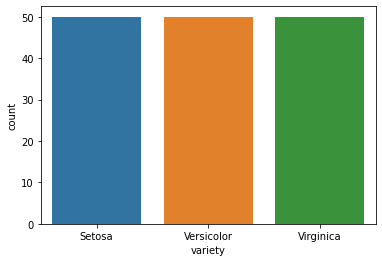

In [11]:
sns.countplot(x = 'variety', data = Iris)
plt.show()

Observation:
1. All the variety of species are divided equally 




Comparing the relationship between variables

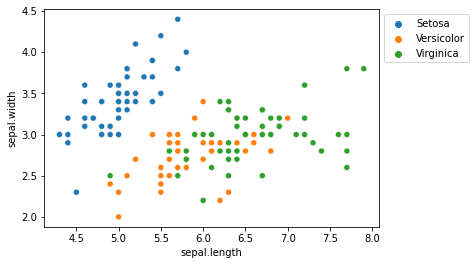

In [12]:
sns.scatterplot(x = 'sepal.length', y = 'sepal.width', hue = 'variety', data = Iris)
plt.legend(bbox_to_anchor = (1, 1) ,loc = 2)
plt.show()

Observations:
1.   Setosa has a smaller sepal length but larger sepal width.
2.   Virginica has a smaller sepal width but larger sepal length
3.   Versicolor lies in the middle in terms of sepal length and width







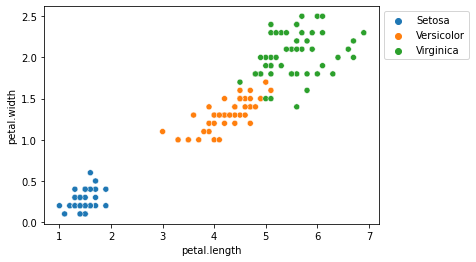

In [13]:
sns.scatterplot(x = 'petal.length', y = 'petal.width', hue = 'variety', data = Iris)
plt.legend(bbox_to_anchor = (1, 1) ,loc = 2)
plt.show()

Observations:
1.   Setosa has a smaller petal length and petal width.
2.   Virginica has a larger petal width and petal length.
3.   Versicolor lies in the middle in terms of petal length and width


Pairplot for better visualisation

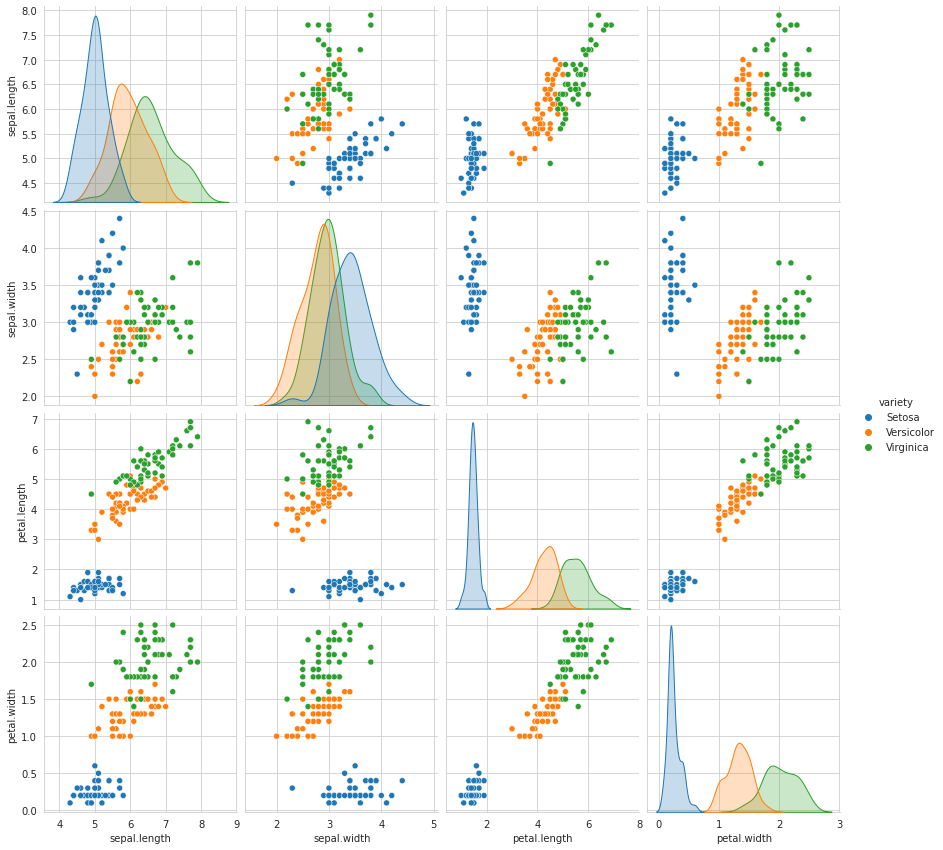

In [24]:
plt.close()
sns.set_style('whitegrid')
sns.pairplot(Iris, hue = 'variety', height = 3)
plt.show()

Histograms for variables

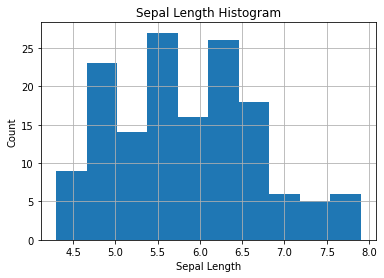

In [14]:
Iris['sepal.length'].hist()
plt.title('Sepal Length Histogram')
plt.xlabel('Sepal Length')
plt.ylabel('Count')
plt.show()

Observation:
1.   Sepal length from 5.4 to 5.7 have the maximum counts.




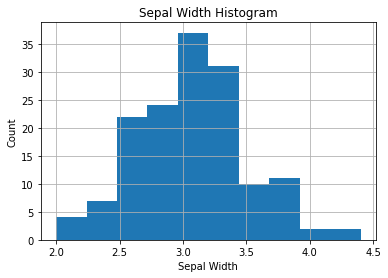

In [15]:
Iris['sepal.width'].hist()
plt.title('Sepal Width Histogram')
plt.xlabel('Sepal Width')
plt.ylabel('Count')
plt.show()

Observation:
1.   Sepal width from 2.95 to 3.3 have the maximum counts.

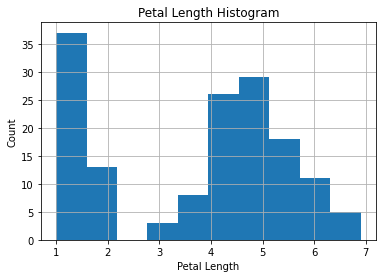

In [16]:
Iris['petal.length'].hist()
plt.title('Petal Length Histogram')
plt.xlabel('Petal Length')
plt.ylabel('Count')
plt.show()

Observation:
1.   Petal length from 1 to 1.5 have the maximum counts.

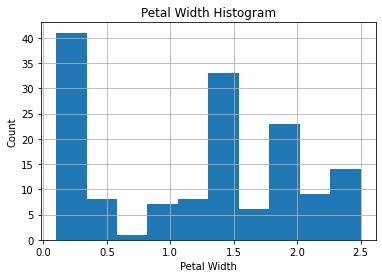

In [17]:
Iris['petal.width'].hist()
plt.title('Petal Width Histogram')
plt.xlabel('Petal Width')
plt.ylabel('Count')
plt.show()

Observation:
1.   Petal width from 0.1 to 0.3 have the maximum counts.

Finding Co-relations

In [27]:
corr = Iris.corr()
corr

,sepal.length,sepal.width,petal.length,petal.width
sepal.length,1.000000,-0.117570,0.871754,0.817941
sepal.width,-0.117570,1.000000,-0.428440,-0.366126
petal.length,0.871754,-0.428440,1.000000,0.962865
petal.width,0.817941,-0.366126,0.962865,1.000000


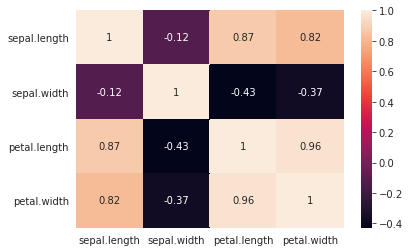

In [28]:
sns.heatmap(corr, annot = True)
plt.show()

Note:
1.   Coorelation values stay between +1 and -1
2.   Values = +1 , are positively coorelated
3.   Values = -1 , are negatively coorelated



## Model Building

Label Encoding for the Dataset

Note : We use label encoding because it helps in converting the lables into numeric forms

In [29]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [34]:
Iris['variety'] = le.fit_transform = (Iris['variety'])
Iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


Model Training

Note : Mostly in model trainings , 70% accounts for training data and 30% accounts for the testing data

In [48]:
from sklearn.model_selection import train_test_split
X = Iris.drop(columns=['variety'])
Y = Iris['variety']
x_train , x_test , y_train , y_test = train_test_split(X , Y , test_size = 0.2)

Logistic Regression

In [49]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [ ]:
model.fit(x_train , y_train)

In [51]:
print('Accuracy of the model :',model.score(x_test , y_test)* 100)


Accuracy of the model : 93.33333333333333


**THANK YOU**